# Run the cells below until the cell with a text !!! TO DO

# Imports

In [2]:
# import the necessary libraries
import pandas as pd
from sklearn import datasets
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Latex

plt.rcParams["figure.figsize"] = (10,6)

## generate dataset for LR

In [3]:
bias = 50
m = 15
n = 1
x, y, coeff = sklearn.datasets.make_regression(
        n_samples = m, 
        n_features = n,
        noise = 40,
        coef = True,
        bias = bias,
        random_state = 42 # if you have read Hitchiker's Guide to the Galaxy then
                          # you know that 42 is the universal answer to life, the universe and everything
                          # https://www.quora.com/Why-do-we-choose-random-state-as-42-very-often-during-training-a-machine-learning-model
    )

In [4]:
print(f'Coefficients of LR: \n\nBeta_0: {bias}\nBeta_1: {np.round(coeff,2)}')

Coefficients of LR: 

Beta_0: 50
Beta_1: 61.19


$$\widehat{y} = \beta_0 + \beta_1 x_1 $$

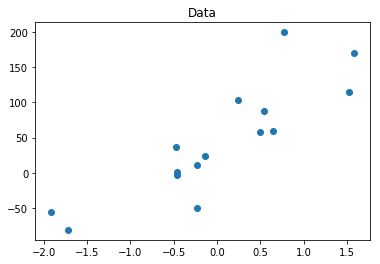

In [5]:
plt.scatter(x,y)
plt.title('Data')
plt.show()

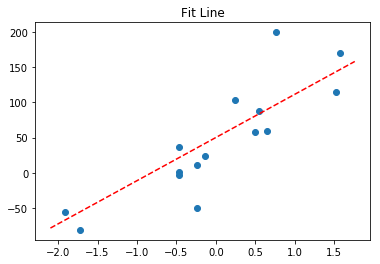

In [6]:
# plot the scatter plot with a line that has an intercept bias and slope coeff
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = bias + coeff * x_vals
plt.plot(x_vals, y_vals, 'r--')
plt.title('Fit Line')
plt.show()

$$MSE = \frac{1}{n} \sum_{i=1}^{n}{\left(y_i-\widehat{y_i}\right)^2} $$
$$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n}{\left(y_i-\widehat{y_i}\right)^2}}$$

In [7]:
def errors(x, y, bias=bias, coeff=coeff, title1='Errors', title2='Squared Errors'):
    """
    The function plots scatter of x, y and line with bias and coefficient. It also calculates RMSE.
    ---------------
    params:
    - x: points on the x-axis
    - y: points on the y-axis
    
    """
    y_hat = bias + x * coeff # predictions of x, we do not have intercept
    diff = y - y_hat.T # differences between predictions and real values

    # let's sort the values
    x_sorted_indices = x.T.argsort() 
    x_sorted = x[x_sorted_indices].reshape(1,15)
    diff_sorted = diff.T[x_sorted_indices].reshape(1,15)
    diff_sorted_sq = diff_sorted**2
    y_hat_sorted = y_hat[x_sorted_indices].reshape(1,15)

    # x, y
    plt.title(title1)
    plt.scatter(x,y)
    
    # line
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = bias + coeff * x_vals
    plt.plot(x_vals, y_vals, 'r--')
    
    # errors
    plt.bar(x_sorted[0], diff_sorted[0], bottom = y_hat_sorted[0], width = 0.02, color = 'g')
    plt.show()
        
    # RMSE
    plt.title(title2)
    plt.bar(x_sorted[0], diff_sorted_sq[0], width = 0.05, color = 'g')
    MSE = np.mean(diff_sorted_sq)
    plt.hlines(MSE, xmin=np.min(x_sorted[0]), xmax=np.max(x_sorted[0]))
    plt.show()
    print(f'Total average difference is: {round(MSE,1)}')
    print(f'RMSE: {round(np.sqrt(MSE),1)}')

# !!! TO DO

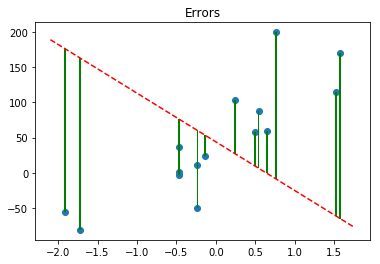

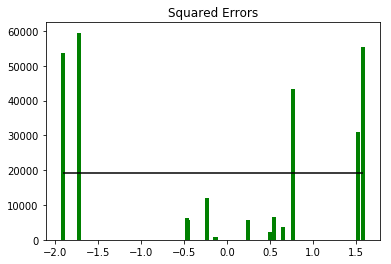

Total average difference is: 19337.8
RMSE: 139.1


In [8]:
errors(x,y, bias = 44, coeff = -69)

## different line

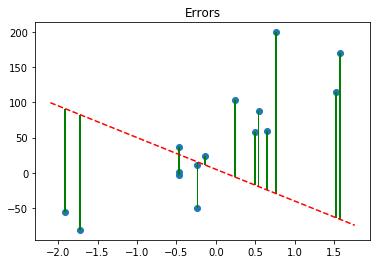

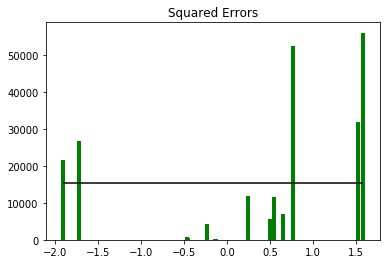

Total average difference is: 15372.8
RMSE: 124.0


In [9]:
errors(x,y, bias = 5, coeff = -45)

## Normal equation

$$MSE = \frac{1}{m} \sum_{i=1}^{m}{\left(y_i-\widehat{y_i}\right)^2} = \frac{1}{m} \sum_{i=1}^{m}{\left(y_i-\beta^T x_i\right)^2} = \frac{1}{m} \left(y-\beta^T x\right)^2 = \frac{1}{m} \left(y-\beta^T x\right)^T \left(y-\beta^T x\right) = \frac{1}{m} \left(y^T- (\beta^T x)^T\right) \left(y-\beta^T x\right) = \frac{1}{m} \left(y^T y- y^T \beta^T x - (\beta^T x)^T y + (\beta^T x)^T \beta^T x \right)$$

$\beta^T x$ is a vector and so is also y, therefore the order of the multiplication does not matter 

$$ J(\beta) = \frac{1}{m} \left(y^T y -2 (\beta^T x)^T y + \beta^T x (\beta^T x)^T \right)$$

We want to find a minimum of the cost function with respect to parameter $\beta$ => $ \frac{\partial J(\beta)}{\partial \beta} = 0$

$$ \frac{\partial J(\beta)}{\partial \beta} = -\frac{2}{m} x^T y + \frac{2}{m}  x^T x \beta = 0$$

$$  x^T x \beta = x^T y $$

$$  \beta = (x^T x)^{-1} x^T y $$

In [10]:
def normal_eq(x,y):
    beta_hat = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
    return(beta_hat)

In [11]:
X = np.c_[np.ones(len(x)),x]
beta_0_hat, beta_1_hat = normal_eq(X,y)
print(f'beta_0: {round(beta_0_hat,2)}\nbeta_1: {round(beta_1_hat,2)}')

beta_0: 44.46
beta_1: 69.78


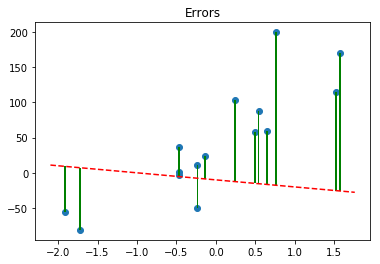

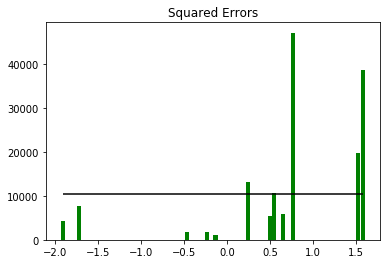

Total average difference is: 10495.3
RMSE: 102.4


In [12]:
errors(x,y, bias = -10, coeff = -10)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x, y)
print(f'beta_0: {np.round(lr.intercept_,2)}\nbeta_1: {np.round(lr.coef_,2)}')


beta_0: 44.46
beta_1: [69.78]


## Gradient Descent

 $$ min_{\beta} \left( J(\beta) \right) = min_{\beta} \left(\frac{1}{m} \sum_{i=1}^{m} \left( y_i-\beta^T x_i\right)^2 \right) $$

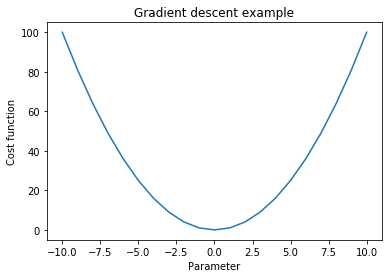

In [14]:
x1=np.arange(-10,11,1)
y1 = x1**2
plt.plot(x1,y1)
plt.xlabel('Parameter')
plt.ylabel('Cost function')
plt.title('Gradient descent example')
plt.show()

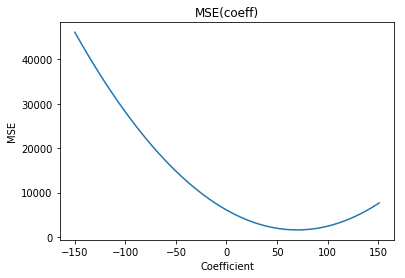

Minimum of the function is for beta_1 = 69.80000000004998
MSE in this point = 1567.2066295390475
RMSE in this point = 39.587960664058556


In [22]:
MSE = []
c_range = np.arange(-150, 151, 0.05)
bias = lr.intercept_

for coeff in c_range:
    y_hat = bias + x * coeff
    MSE.append(np.mean((y.reshape(len(y_hat),1)-y_hat)**2))

plt.plot(c_range, MSE)
plt.title('MSE(coeff)')
plt.xlabel('Coefficient')
plt.ylabel('MSE')
plt.show()
print(f'Minimum of the function is for beta_1 = {c_range[np.argmin(MSE)]}\nMSE in this point = {min(MSE)}\nRMSE in this point = {np.sqrt(min(MSE))}')

$$MSE(\beta) = \frac{1}{m} \left( y - \beta^T X \right)^2 $$


$$- \nabla_{\beta} MSE(\beta) = \frac{2}{m}X^T(X \beta - y) $$

$$\beta_{t+1} = \beta_{t} - \alpha \nabla_{\beta} MSE(\beta)$$


### algo

In [23]:
alpha = 0.1 # learning rate
n_iter = 100 # #iterations
m = m # #observations
beta = np.random.randn(2, 1)*300 # initialize randomly beta_0 and beta_1
y_ = y.copy().reshape(15, 1) # align dimension with X as y was previously of shape (15,). we want shape (15, 1)

betas_0 = []
betas_1 = []
for iter in range(n_iter):
    gradient = 2/m*X.T.dot((X.dot(beta) - y_))
    betas_0.append(beta[0][0])
    betas_1.append(beta[1][0])
    beta = beta - alpha * gradient
print(f'Final parameters value: {beta}')

Final parameters value: [[44.45958168]
 [69.78228605]]


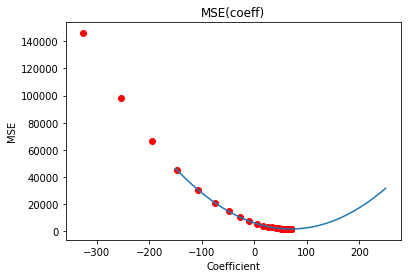

Minimum of the function is for beta_1 = 69.78228590894156
MSE in this point = 1567.2063402493634
RMSE in this point = 39.58795701030003


In [24]:
MSE = []
c_range = range(-150, 251, 1)
bias = 44.46

for idx, coeff in enumerate(c_range):
    y_hat = bias + x * coeff
    MSE.append(np.mean((y.reshape(15,1)-y_hat)**2))
    
# compute MSE with iterative betas
MSE_betas = []
for idx, beta_1 in enumerate(betas_1):
    y_hat_betas = bias + x * betas_1[idx]
    MSE_betas.append(np.mean((y.reshape(15,1)-y_hat_betas)**2))

plt.plot(c_range, MSE)
plt.scatter(betas_1, MSE_betas, color = 'r')
plt.title('MSE(coeff)')
plt.xlabel('Coefficient')
plt.ylabel('MSE')
plt.show()
print(f'Minimum of the function is for beta_1 = {betas_1[-1]}\nMSE in this point = {MSE_betas[-1]}\nRMSE in this point = {np.sqrt(MSE_betas[-1])}')

#### let's try with high learning rate

In [25]:
alpha = 1 # learning rate
n_iter = 100 # #iterations
m = m # #observations
beta = np.random.randn(2, 1)*300 # initialize randomly beta_0 and beta_1
y_ = y.copy().reshape(15, 1) # align dimension with X as y was previously of shape (15,). we want shape (15, 1)

betas_0 = []
betas_1 = []
for iter in range(n_iter):
    gradient = 2/m*X.T.dot((X.dot(beta) - y_))
    betas_0.append(beta[0][0])
    betas_1.append(beta[1][0])
    beta = beta - alpha * gradient
print(f'Final parameters value: {beta}')

Final parameters value: [[418.78512845]
 [118.94359645]]


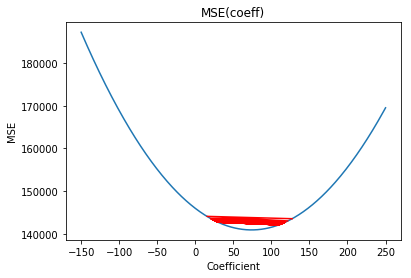

Minimum of the function is for beta_1 = 20.754245105428907
MSE in this point = 143524.58979677394
RMSE in this point = 378.8463934060531


In [26]:
MSE = []
c_range = range(-150, 251, 1)
bias = betas_0[-1]

for idx, coeff in enumerate(c_range):
    y_hat = bias + x * coeff
    MSE.append(np.mean((y.reshape(15,1)-y_hat)**2))
    
# compute MSE with iterative betas
MSE_betas = []
for idx, beta_1 in enumerate(betas_1):
    y_hat_betas = bias + x * betas_1[idx]
    MSE_betas.append(np.mean((y.reshape(15,1)-y_hat_betas)**2))

plt.plot(c_range, MSE)
plt.plot(betas_1, MSE_betas, color = 'r')
plt.title('MSE(coeff)')
plt.xlabel('Coefficient')
plt.ylabel('MSE')
plt.show()
print(f'Minimum of the function is for beta_1 = {betas_1[-1]}\nMSE in this point = {MSE_betas[-1]}\nRMSE in this point = {np.sqrt(MSE_betas[-1])}')

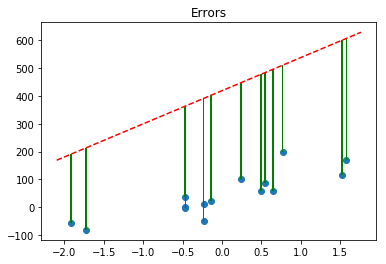

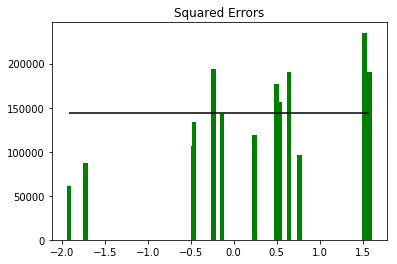

Total average difference is: 144297.4
RMSE: 379.9


In [27]:
errors(x,y,bias=beta[0],coeff=beta[1])

#### let's try with small learning rate

In [28]:
alpha = 1e-5 # learning rate
n_iter = 1000000 # #iterations
m = m # #observations
beta = np.random.randn(2, 1)*300 # initialize randomly beta_0 and beta_1
y_ = y.copy().reshape(15, 1) # align dimension with X as y was previously of shape (15,). we want shape (15, 1)

betas_0 = []
betas_1 = []
for iter in range(n_iter):
    gradient = 2/m*X.T.dot((X.dot(beta) - y_))
    betas_0.append(beta[0][0])
    betas_1.append(beta[1][0])
    beta = beta - alpha * gradient
print(f'Final parameters value: {beta}')

Final parameters value: [[44.45958109]
 [69.78228769]]


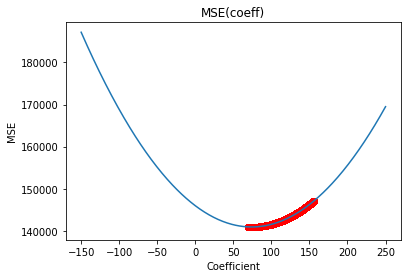

Minimum of the function is for beta_1 = 69.78228768656155


In [29]:
MSE = []
c_range = range(-150, 251, 1)
bias = bias #betas_0[-1]

for idx, coeff in enumerate(c_range):
    y_hat = bias + x * coeff
    MSE.append(np.mean((y.reshape(15,1)-y_hat)**2))
    
# compute MSE with iterative betas
MSE_betas = []
for idx, beta_1 in enumerate(betas_1):
    y_hat_betas = bias + x.reshape(15,1) * betas_1[idx]
    MSE_betas.append(np.mean((y.reshape(15,1)-y_hat_betas)**2))

plt.plot(c_range, MSE)
plt.scatter(betas_1, MSE_betas, color = 'r')
plt.title('MSE(coeff)')
plt.xlabel('Coefficient')
plt.ylabel('MSE')
plt.show()
print(f'Minimum of the function is for beta_1 = {betas_1[-1]}') #\nMSE in this point = {MSE_betas[-1]}\nRMSE in this point = {np.sqrt(MSE_betas[-1])}

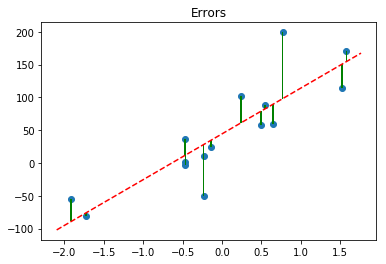

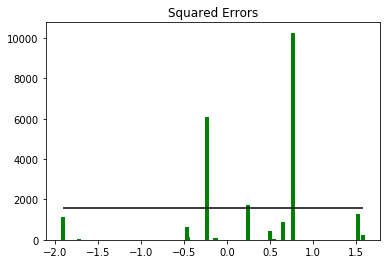

Total average difference is: 1567.2
RMSE: 39.6


In [30]:
errors(x,y,bias=beta[0],coeff=beta[1])

$$ ||\nabla_{\beta} J(\beta)||<\epsilon$$
$$ \alpha = \frac{\alpha}{2}$$

## Stochastic GD
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [31]:
from sklearn.linear_model import SGDRegressor
sgd_lr = SGDRegressor()
sgd_lr.fit(x, y)
print(f'beta_0: {sgd_lr.intercept_}\nbeta_1: {sgd_lr.coef_}')


beta_0: [12.76860506]
beta_1: [18.78630769]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [32]:
alpha = 0.1
sgd_lr = SGDRegressor(max_iter=1e5, eta0 = alpha)
sgd_lr.fit(x, y)
print(f'beta_0: {sgd_lr.intercept_}\nbeta_1: {sgd_lr.coef_}')

beta_0: [44.46639096]
beta_1: [69.74738488]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


# Regularization

In [33]:
z = np.polyfit(x.reshape(-1), y, 7)
p = np.poly1d(z)

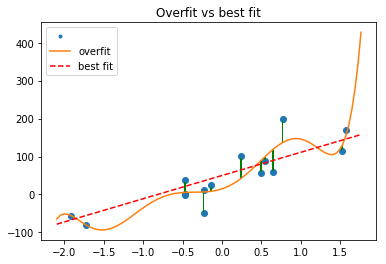

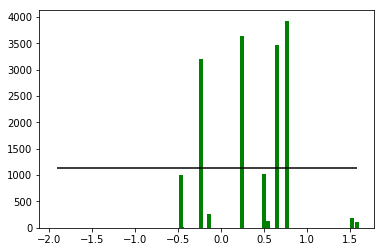

Total average difference is: 1135.0
RMSE: 33.7


In [34]:
yp_hat = p(x)

diff = y - yp_hat.T # differences between predictions and real values

# let's sort the values
x_sorted_indices = x.T.argsort() 
x_sorted = x[x_sorted_indices].reshape(1,15)
diff_sorted = diff.T[x_sorted_indices].reshape(1,15)
diff_sorted_sq = diff_sorted**2
y_hat_sorted = yp_hat[x_sorted_indices].reshape(1,15)

# x, y
plt.scatter(x,y)

# line
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
xp = np.linspace(x_vals[0], x_vals[1], 100)
plt.plot(x, y, '.', xp, p(xp), '-', x_vals, y_vals, 'r--')

# errors
plt.bar(x_sorted[0], diff_sorted[0], bottom = y_hat_sorted[0], width = 0.02, color = 'g')
plt.title('Overfit vs best fit')
plt.legend(['', 'overfit', 'best fit'])
plt.show()

# RMSE
plt.bar(x_sorted[0], diff_sorted_sq[0], width = 0.05, color = 'g')
MSE = np.mean(diff_sorted_sq)
plt.hlines(MSE, xmin=np.min(x_sorted[0]), xmax=np.max(x_sorted[0]))


plt.show()
print(f'Total average difference is: {round(MSE,1)}')
print(f'RMSE: {round(np.sqrt(MSE),1)}')

In [63]:
bias_r = 50
mr = 300
nr = 200
xr, yr, coeff_r = sklearn.datasets.make_regression(
        n_samples = mr, 
        n_features = nr,
        noise = 40,
        coef = True,
        bias = bias_r,
        random_state = 42 # if you have read Hitchiker's Guide to the Galaxy then
                          # you know that 42 is the universal answer to life, the universe and everything
                          # https://www.quora.com/Why-do-we-choose-random-state-as-42-very-often-during-training-a-machine-learning-model
    )

## ridge

$$ MSE(\beta) = \frac{1}{m} \sum_{1}^{m} \left( y_i - \widehat{y_i}\right)^2 = \frac{1}{m} \left( y - \beta^T X \right)^2 $$
$$ J(\beta) = MSE(\beta) + \alpha \sum_{1}^{n} \beta_i^2 = MSE(\beta) + \alpha ||\beta||_2^2$$
$$ ||x||_2 = \sqrt{x_1^2 + ... + x_n^2}$$

$$ \beta = \left(X_T X + \alpha I\right)^{-1}X^T Y $$


In [124]:
def plot_coef(lr_coef, chart=True):
    print(f'AVG coef value: {np.mean(lr_coef)}')
    if chart:
        plt.plot(lr_coef)
        plt.title("Coefficients' values")
        plt.show()

AVG coef value: 2.960232157242392


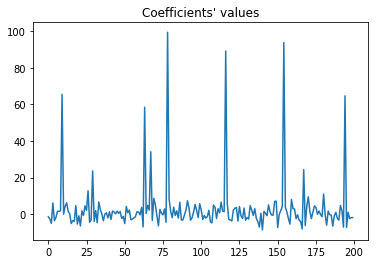

In [125]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xr, yr)
plot_coef(lr.coef_)

In [126]:
from sklearn.linear_model import Ridge
lr_r = Ridge(alpha=1)
lr_r.fit(xr, yr)
plot_coef(lr_r.coef_, False)

AVG coef value: 2.9258322569643904


In [127]:
lr_r = Ridge(alpha=20)
lr_r.fit(xr, yr)
plot_coef(lr_r.coef_, False)

AVG coef value: 2.4511495895534905


In [128]:
lr_r = Ridge(alpha=75)
lr_r.fit(xr, yr)
plot_coef(lr_r.coef_, False)

AVG coef value: 1.828576844119029


### Lasso

$$ J(\beta) = MSE(\beta) + \alpha \sum_{1}^{n} |\beta_i| = MSE(\beta) + \alpha ||\beta||_1$$

$$ ||x||_1 = |x_1| + ... + |x_n| $$

$$ ||x||_p = \left(|x_1|^p + ... + |x_n|^p\right)^{(1/p)} $$

AVG coef value: 2.7392296126417732


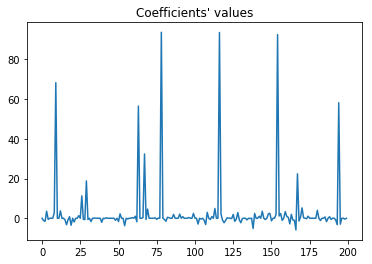

In [113]:
from sklearn.linear_model import Lasso
lr_l = Lasso(alpha=1)
lr_l.fit(xr, yr)
plot_coef(lr_l.coef_, False)

In [129]:
lr_l = Lasso(alpha=20)
lr_l.fit(xr, yr)
plot_coef(lr_l.coef_)

AVG coef value: 1.8657211666458542


AVG coef value: 0.3869397827600356


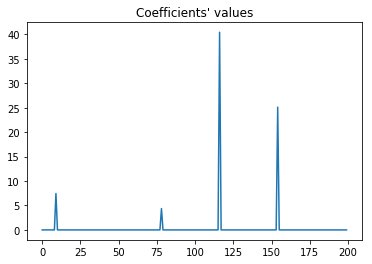

In [131]:
lr_l = Lasso(alpha=75)
lr_l.fit(xr, yr)
plot_coef(lr_l.coef_)

### Elastic net

$$ J(\beta) = MSE(\beta) + \alpha ||\beta||_1 + (1-\alpha) ||\beta||_2^2$$

AVG coef value: 1.4106187418793132


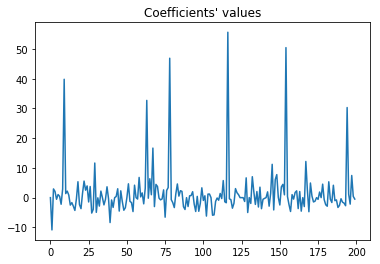

In [134]:
from sklearn.linear_model import ElasticNet
lr_en = ElasticNet(l1_ratio=0.4)
lr_en.fit(xr, yr)
plot_coef(lr_en.coef_)

AVG coef value: 0.3869397827600356


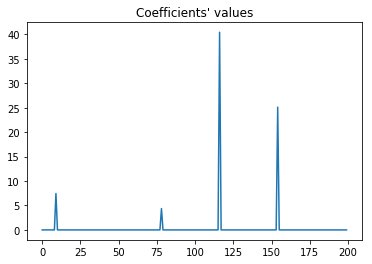

In [139]:
lr_en = ElasticNet(l1_ratio=1, alpha=75)
lr_en.fit(xr, yr)
plot_coef(lr_en.coef_)

# Logistic regression

## Data Generation For Logistic Regression

In [185]:
from sklearn.datasets import make_blobs
x_log, y_log = make_blobs(n_samples=100, centers=2, n_features=1, random_state=42)

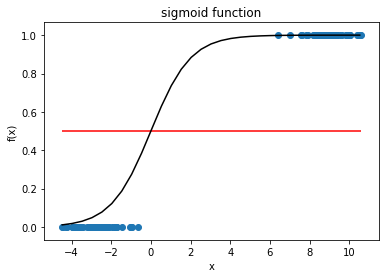

In [186]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_s = np.arange(np.min(x_log),np.max(x_log),0.5)
sig = sigmoid(x_s)
plt.plot(x_s, sig, c='k')
plt.scatter(x_log, y_log)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('sigmoid function')
plt.hlines(0.5, np.min(x_log), np.max(x_log), 'r')
plt.show()

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

x_log, y_log = make_blobs(n_samples=100, centers=5, n_features=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(x_log, y_log, random_state=42)
logr= LogisticRegression()
logr.fit(X_train, y_train)
confusion_matrix(logr.predict(X_test), y_test)
# logr.predict_proba(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[5, 0, 0, 0, 0],
       [0, 5, 0, 0, 0],
       [0, 0, 6, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]], dtype=int64)

$$ \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$$

$$ \sigma\left(\beta_0 + \beta_1 x_1 + ... + \beta_n x_n \right)$$

$$ \widehat{p} = \sigma(x) = \frac{1}{1+exp(-x)}$$

$$ logit(p) = log(\frac{p}{1-p}) = log\left(\frac{\frac{1}{1+exp(-x)}}{1-\frac{1}{1+exp(-x)}}\right) = log\left(\frac{\frac{1}{1+exp(-x)}}{\frac{1 + exp(-x) - 1} {1+exp(-x)}}\right) = log\left(\frac{1}{exp(-x)}\right) = log(exp(x))= x$$

#### cost function

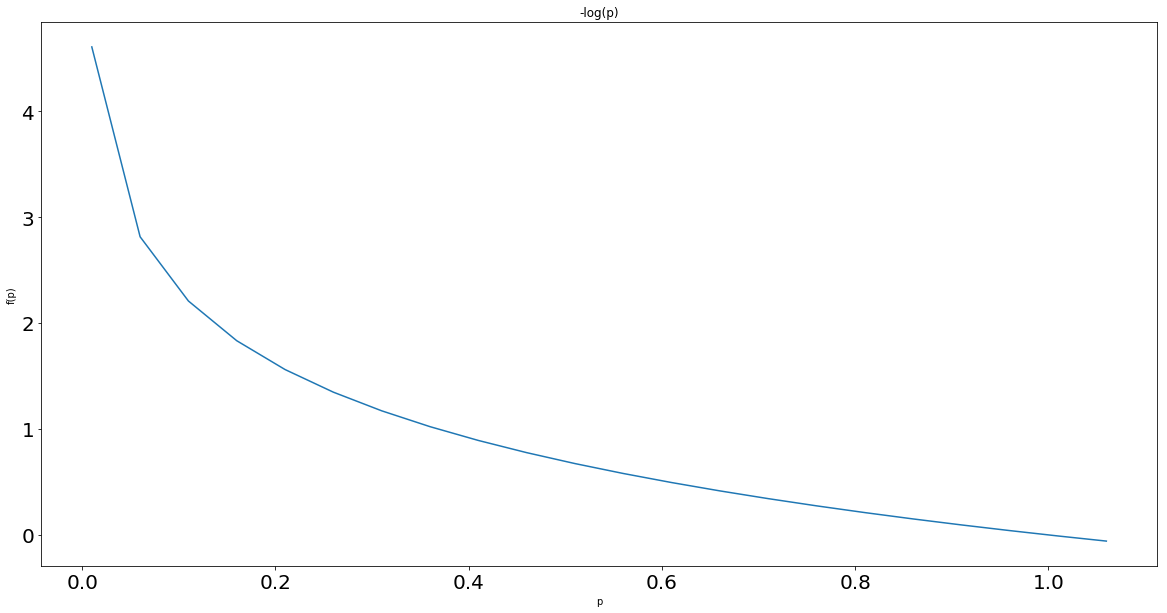

In [50]:
x_s = np.arange(0.01,1.1,0.05)
plt.plot(x_s, -np.log(x_s))
plt.xlabel('p')
plt.ylabel('f(p)')
plt.title('-log(p)')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=18)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


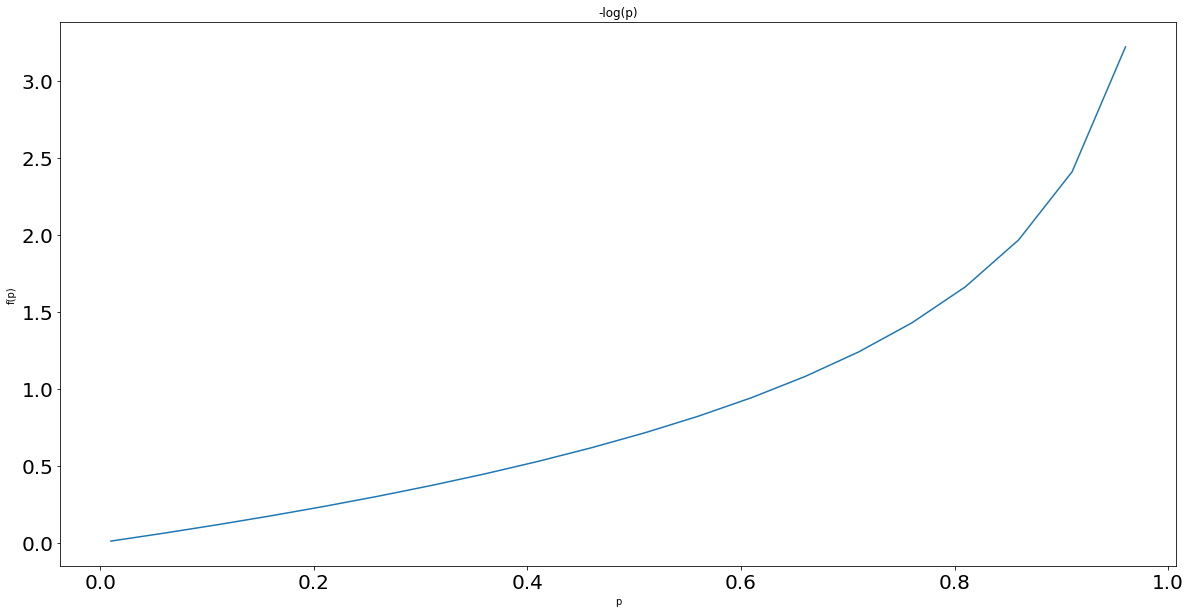

In [51]:
x_s = np.arange(0.01,1.1,0.05)
plt.plot(x_s, -np.log(1-x_s))
plt.xlabel('p')
plt.ylabel('f(p)')
plt.title('-log(p)')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=18)
plt.show()

$$ C_1(\beta) = -log(\widehat{p}) $$

$$ C_0(\beta) = -log(1-\widehat{p}) $$

$$ J(\beta) = \frac{1}{m} \sum_{1}^{m} \left[ y_i C_1(\beta) + (1 - y_i) C_0(\beta)\right] = \frac{1}{m} \sum_{1}^{m} \left[ y_i (-log(\widehat{p_i})) + (1 - y_i) (-log(1 - \widehat{p_i}))\right]$$ 

## Bias variance tradeoff

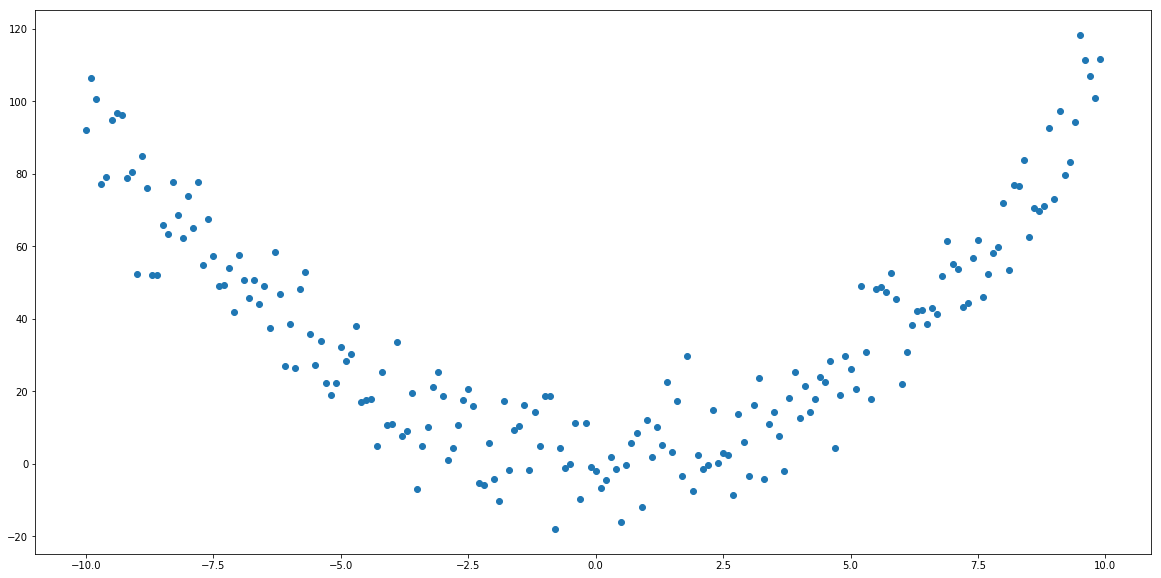

In [52]:
x_q = np.arange(-10,10,0.1)
y_q = x_q**2 + np.random.randn(len(x_q))*10
x_q = x_q.reshape(len(x_q),1)
plt.scatter(x_q, y_q)

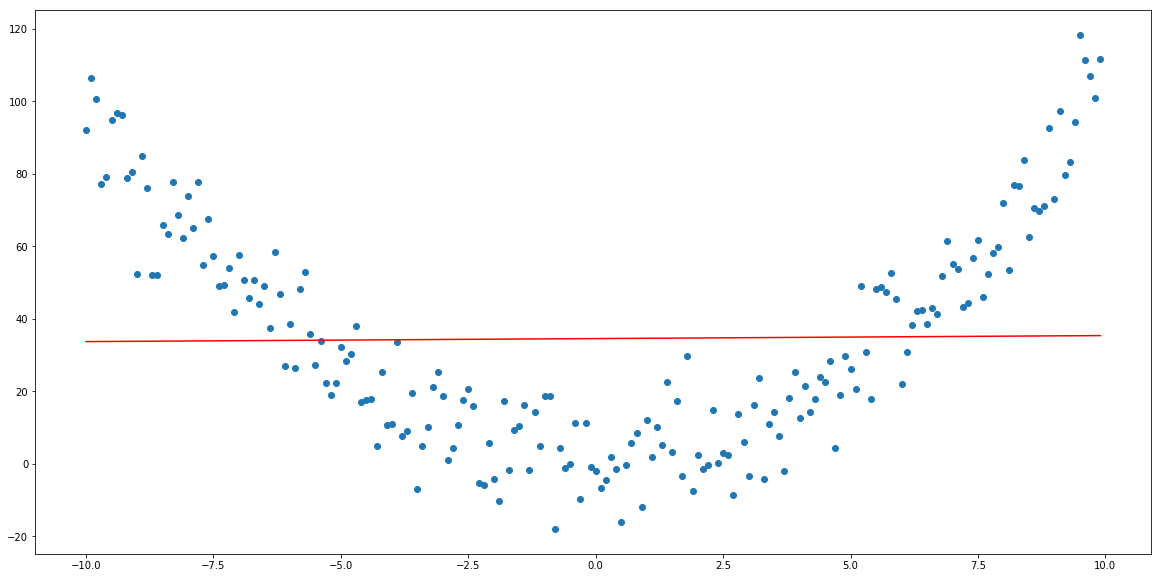

In [53]:
# fit linear reg
lr_q = LinearRegression().fit(x_q.reshape(len(x_q), 1), y_q.reshape(len(x_q), 1))

plt.scatter(x_q, y_q)
plt.plot(x_q, lr_q.predict(x_q), color = 'r')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


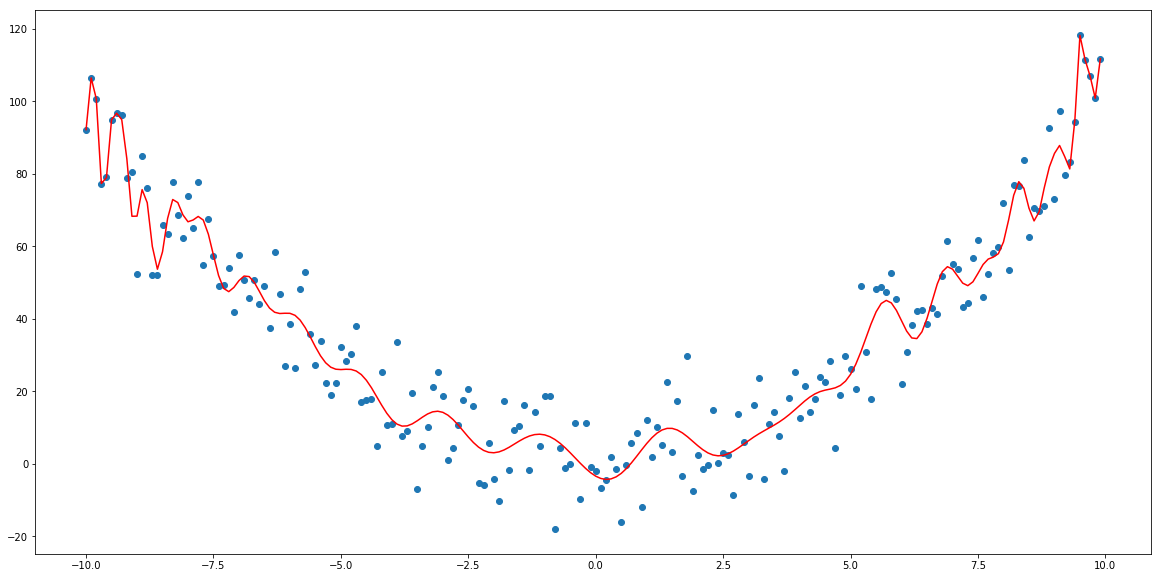

In [62]:
z = np.polyfit(x_q.reshape(-1), y_q, 200)
p = np.poly1d(z)

plt.scatter(x_q, y_q)
plt.plot(x_q, p(x_q), color = 'r')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RankWarning: Polyfit may be poorly conditioned
  """


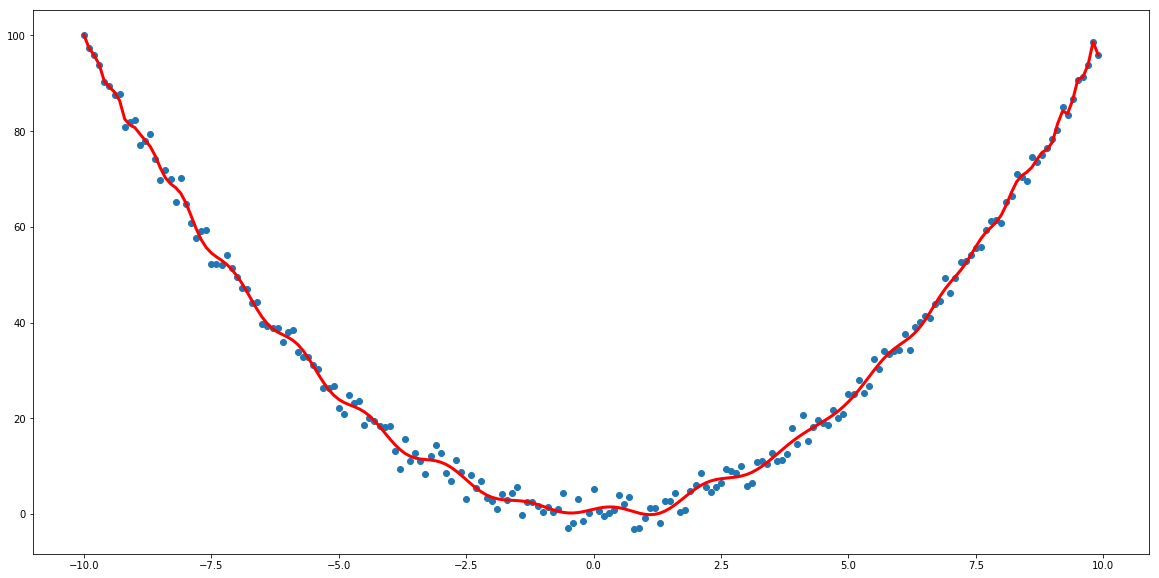

In [67]:
# not so noisy data
x_q = np.arange(-10,10,0.1)
y_q = x_q**2 + np.random.randn(len(x_q))*2
x_q = x_q.reshape(len(x_q),1)

z = np.polyfit(x_q.reshape(-1), y_q, 200)
p = np.poly1d(z)

plt.scatter(x_q, y_q)
plt.plot(x_q, p(x_q), color = 'r', linewidth = 3)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RankWarning: Polyfit may be poorly conditioned
  


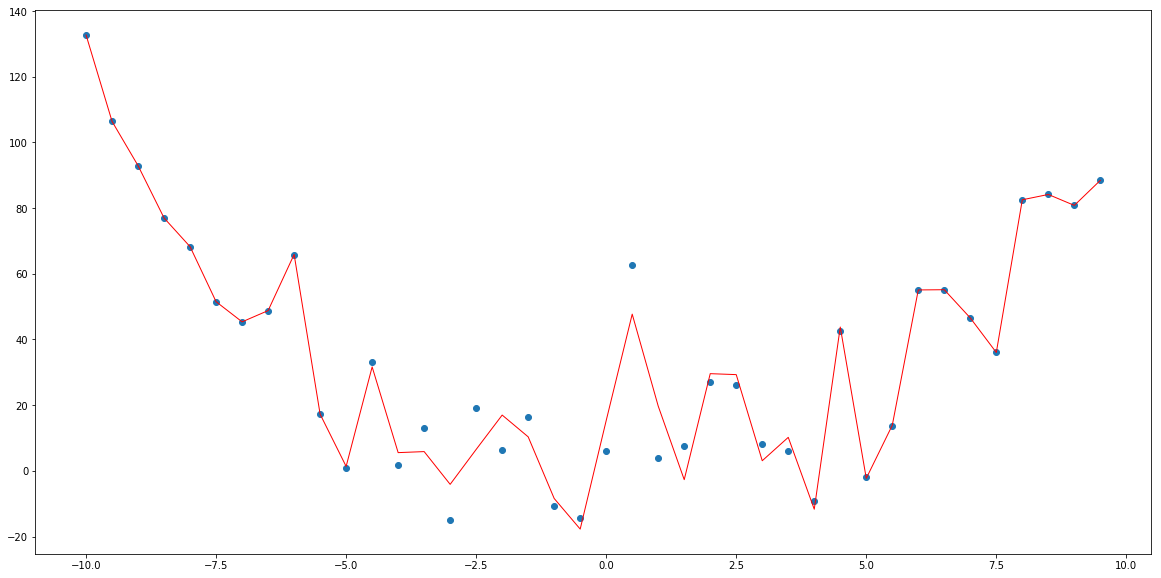

In [72]:
# not so noisy data
x_q = np.arange(-10,10,0.5)
y_q = x_q**2 + np.random.randn(len(x_q))*20
x_q = x_q.reshape(len(x_q),1)

z = np.polyfit(x_q.reshape(-1), y_q, 200)
p = np.poly1d(z)

plt.scatter(x_q, y_q)
plt.plot(x_q, p(x_q), color = 'r', linewidth = 1)
plt.show()